<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Trial" data-toc-modified-id="First-Trial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Trial</a></span></li><li><span><a href="#Who-Contributes-Most?---components_" data-toc-modified-id="Who-Contributes-Most?---components_-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Who Contributes Most? - <code>components_</code></a></span></li><li><span><a href="#Find-the-Best-N-Components-Among-the-3-Features" data-toc-modified-id="Find-the-Best-N-Components-Among-the-3-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find the Best N Components Among the 3 Features</a></span></li><li><span><a href="#Find-the-Best-N-Components-Among-the-All-Features" data-toc-modified-id="Find-the-Best-N-Components-Among-the-All-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find the Best N Components Among the All Features</a></span></li><li><span><a href="#Versus-Principal-Component-Analysis" data-toc-modified-id="Versus-Principal-Component-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Versus Principal Component Analysis</a></span></li><li><span><a href="#Dig-More" data-toc-modified-id="Dig-More-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dig More</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
from mpl_toolkits.mplot3d import Axes3D
#plt.rc('axes', facecolor='#FFFFFF')

In [3]:
from sklearn.decomposition import FactorAnalysis as FA

In [4]:
star98_df = sm.datasets.star98.load_pandas().data
X = star98_df[['LOWINC', 'PERMINTE', 'PERHISP']]

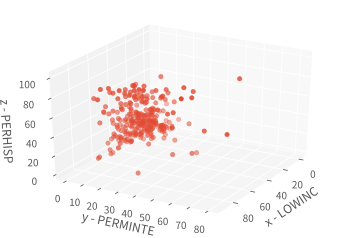

In [5]:
with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()

    # https://matplotlib.org/mpl_toolkits/mplot3d/api.html#module-mpl_toolkits.mplot3d.axes3d
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('x - LOWINC')
    ax.set_ylabel('y - PERMINTE')
    ax.set_zlabel('z - PERHISP')

    ax.scatter(star98_df.LOWINC, star98_df.PERMINTE, star98_df.PERHISP)

    # view_init(elev=None, azim=None)
    #
    # - ‘elev’ stores the elevation angle in the z plane.
    # - ‘azim’ stores the azimuth angle in the x, y plane.
    #
    # ref: https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init
    ax.view_init(30, 30)

# Factor Analysis

Describe observed variables in terms of a potentially lower number of unobserved variables called factors. 
    
$ {\begin{matrix}z_{1,i}&=&\ell _{1,1}F_{1,i}&+&\ell _{1,2}F_{2,i}&+&\ell _{1,p}F_{p,i}&+&\varepsilon _{1,i}\\\vdots &&\vdots &&\vdots &&\vdots &&\vdots\\z_{a,i}&=&\ell _{a,1}F_{1,i}&+&\ell _{a,2}F_{2,i}&+&\ell _{a,p}F_{p,i}&+&\varepsilon _{a,i}\end{matrix}} $

$ \equiv $

$ z_{ai}=\sum _{p}\ell _{ap}F_{pi}+\varepsilon _{ai} $

* $ x_{ai} $: the observed random variable of $a$-th subject (e.g., student) and $i$-th instance (e.g., question).
* $ z_{ai} $: the standardized $ x_{ai} $.
* $ F_{pi} $: the unobserved common factor, influencing all the observed random variables (e.g., mathematical intelligence).
* $ \ell_{ap} $: the factor loading.
* $ \varepsilon_{ai} $: the noise.

In matrix notation,

$ Z=LF+\epsilon $

## First Trial

In [6]:
fa = FA(n_components=2)

In [7]:
# fit the model with X, and apply the dimensionality reduction on X
X_fa = fa.fit_transform(X)

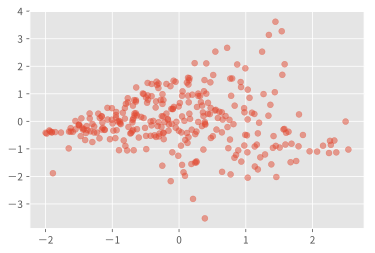

In [8]:
# [:, 0]: all rows and the first column
plt.scatter(x=X_fa[:, 0], y=X_fa[:, 1], alpha=0.5)

## Who Contributes Most? - `components_`

In [9]:
fa_comp_pd = pd.DataFrame(
    data=fa.components_,
    index=['comp_1', 'comp_2'],
    columns=['LOWINC', 'PERMINTE', 'PERHISP']
)
fa_comp_pd

,LOWINC,PERMINTE,PERHISP
comp_1,20.354360,6.571863,19.178596
comp_2,1.446514,-4.240020,-15.506578


* `components_`: the loading matrix.

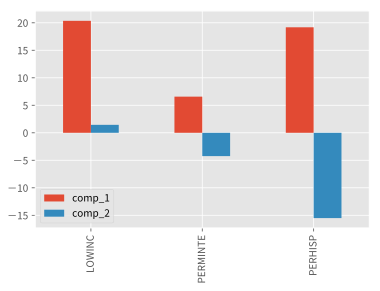

In [10]:
fa_comp_pd.T.plot.bar()

## Find the Best N Components Among the 3 Features

In [11]:
n = 3
my_X = X

In [12]:
my_fa_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_fa_score_df

In [13]:
for i in my_fa_score_df.index:
    my_fa = FA(n_components=i)
    my_fa.fit(my_X)
    my_fa_score_df.loc[i, 'score'] = my_fa.score(my_X)  # -> the average log-likelihood of the samples

In [14]:
fa_score_df_3 = my_fa_score_df
fa_score_df_3

,score
1,-12.372341
2,-12.372270
3,-12.372270


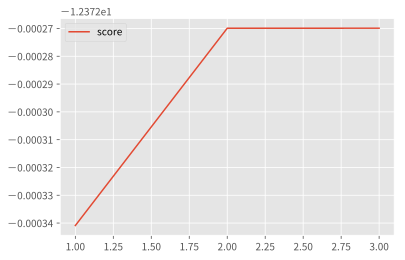

In [15]:
fa_score_df_3.plot()

## Find the Best N Components Among the All Features

In [16]:
n = 14
my_X = star98_df.iloc[:, :14]

In [17]:
my_fa_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_fa_score_df

In [18]:
for i in my_fa_score_df.index:
    my_fa = FA(n_components=i)
    my_fa.fit(my_X)
    my_fa_score_df.loc[i, 'score'] = my_fa.score(my_X)

In [19]:
fa_score_df_all = my_fa_score_df
fa_score_df_all

,score
1,-56.256788
2,-55.915237
3,-55.171966
4,-55.051434
5,-54.957597
6,-54.362009
7,-54.526042
8,-54.520515
9,-54.504081
10,-54.501224


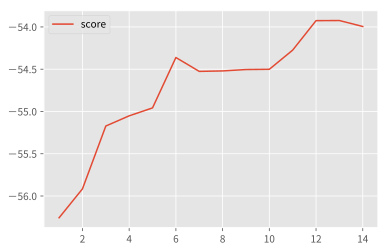

In [20]:
fa_score_df_all.plot()

## Versus Principal Component Analysis

* FA considers the noise, while PCA doesn't.
* But PCA is a simple linear algebra technique and faster.
* FA can be readily interpreted.

## Dig More

* [sklearn.decomposition.FactorAnalysis – Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis)
* [Factor analysis – Wikipedia](https://en.wikipedia.org/wiki/Factor_analysis)